In [13]:
import geopandas as gpd
from shapely.geometry import box, Polygon
from hyperpack import HyperPack
import re

# Función para generar ítems adicionales
def generate_balanced_items(count, figure_1, figure_2):
    items = {}
    for i in range(count):
        items[f"item-{2*i}"] = figure_1
        items[f"item-{2*i+1}"] = figure_2
    return items

# Función para verificar y agregar ítems hasta que se llene el contenedor
def pack_items_until_full(container, figure_1, figure_2, settings):
    count = 1  # Empezamos con una figura de cada tipo
    max_count = 0
    while True:
        items = generate_balanced_items(count, figure_1, figure_2)
        problem_data = {
            "containers": container,
            "items": items,
            "settings": settings
        }
        
        # Crear la instancia del problema
        problem = HyperPack(**problem_data)
        
        # Realizar la búsqueda
        problem.hypersearch()
        
        # Obtener la solución
        solution_log = problem.log_solution()
        print(solution_log)

        # Extraer ítems restantes del log
        remaining_items_match = re.search(r"Remaining items : \[(.*)\]", solution_log)
        remaining_items = remaining_items_match.group(1).split(", ") if remaining_items_match else []

        # Si hay ítems restantes, hemos terminado
        if remaining_items and remaining_items[0] != '':
            break
        
        # Si no hay ítems restantes, almacenar el máximo alcanzado
        max_count = count
        
        # Aumentar el contador de figuras
        count += 1
    
    # Retroceder un paso para la solución final sin residuos
    items = generate_balanced_items(max_count, figure_1, figure_2)
    problem_data = {
        "containers": container,
        "items": items,
        "settings": settings
    }
    
    # Crear la instancia final del problema
    problem = HyperPack(**problem_data)
    problem.hypersearch()
    
    # Mostrar la figura final de la solución
    problem.create_figure(show=True)
    return problem.solution

# Pedir al usuario que ingrese las dimensiones del contenedor y las figuras
def get_user_input():
    W = int(input("Ingrese el ancho del contenedor: "))
    L = int(input("Ingrese el largo del contenedor: "))
    
    w1 = int(input("Ingrese el ancho de la figura 1: "))
    l1 = int(input("Ingrese el largo de la figura 1: "))
    
    w2 = int(input("Ingrese el ancho de la figura 2: "))
    l2 = int(input("Ingrese el largo de la figura 2: "))
    
    container = {
        "container-0": {
            "W": W,
            "L": L
        }
    }
    
    figure_1 = {"w": w1, "l": l1}
    figure_2 = {"w": w2, "l": l2}
    
    return container, figure_1, figure_2

# Función para guardar la solución en un archivo shapefile
def save_solution_as_shapefile(solution, filename="solution.shp"):
    geometries = []
    for container_id, items in solution.items():
        for item_id, coords in items.items():
            x, y, width, height = coords
            rectangle = box(x, y, x + width, y + height)
            geometries.append(rectangle)
    
    gdf = gpd.GeoDataFrame(geometry=geometries)
    gdf.to_file(filename, driver="ESRI Shapefile")
    print(f"Solution saved to {filename}")

# Definir la configuración (settings)
settings = {
    "algorithm": "hypersearch",
    "max_iterations": 1000
}

# Obtener entradas del usuario
container, figure_1, figure_2 = get_user_input()

# Ejecutar la función para empaquetar ítems hasta que se llene el contenedor
solution = pack_items_until_full(container, figure_1, figure_2, settings)
print("Final Solution:")
print(solution)

# Guardar la solución en un archivo shapefile
save_solution_as_shapefile(solution)



Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 7.2917%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 14.5833%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 21.8750%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 29.1667%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 36.4583%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 43.7500%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 51.0417%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 58.3333%

Remaining item

Final Solution:
{'container-0': {'item-8': [0, 0, 25, 15], 'item-6': [0, 15, 25, 15], 'item-4': [0, 30, 25, 15], 'item-24': [0, 45, 25, 15], 'item-22': [25, 0, 25, 15], 'item-20': [25, 15, 25, 15], 'item-2': [25, 30, 25, 15], 'item-18': [25, 45, 25, 15], 'item-16': [50, 0, 25, 15], 'item-14': [50, 15, 25, 15], 'item-12': [50, 30, 25, 15], 'item-10': [50, 45, 25, 15], 'item-0': [75, 0, 25, 15], 'item-9': [75, 15, 15, 10], 'item-7': [75, 25, 15, 10], 'item-5': [75, 35, 15, 10], 'item-3': [75, 45, 15, 10], 'item-25': [100, 0, 15, 10], 'item-23': [100, 10, 15, 10], 'item-21': [90, 15, 10, 15], 'item-19': [90, 30, 15, 10], 'item-17': [90, 40, 15, 10], 'item-15': [90, 50, 15, 10], 'item-13': [100, 20, 15, 10], 'item-11': [105, 30, 15, 10], 'item-1': [105, 40, 15, 10]}}
Solution saved to solution.shp


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.



Example shapefile created at example_half_circle.shp


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.



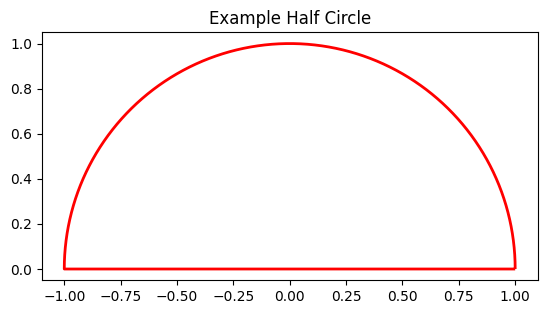

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
from shapely.affinity import rotate
import numpy as np

# Crear un GeoDataFrame con un medio círculo
def create_example_shapefile_with_half_circle(filename="example_half_circle.shp"):
    # Crear un medio círculo
    angle_range = np.linspace(0, np.pi, 100)  # Rango de ángulos para medio círculo
    circle_points = [(np.cos(angle), np.sin(angle)) for angle in angle_range]
    circle_points.append((0, 0))  # Cerrar la figura
    half_circle = Polygon(circle_points)
    
    # Crear un GeoDataFrame
    gdf = gpd.GeoDataFrame(geometry=[half_circle])
    
    # Guardar el GeoDataFrame como un archivo Shapefile
    gdf.to_file(filename, driver="ESRI Shapefile")
    print(f"Example shapefile created at {filename}")

# Crear el archivo Shapefile de ejemplo con un medio círculo
create_example_shapefile_with_half_circle()

# Leer el archivo Shapefile y visualizar el medio círculo
gdf = gpd.read_file("example_half_circle.shp")
gdf.plot(edgecolor='red', linewidth=2, facecolor='none')
plt.title("Example Half Circle")
plt.show()


In [ ]:
from shapely.geometry import MultiPoint

# Función para calcular el rectángulo mínimo rotado y visualizarlo
def visualize_minimum_rotated_rectangle_with_closed_figure(shapefile_path):
    # Leer el shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Extraer los puntos del polígono cerrado
    points = []
    for geom in gdf.geometry:
        if geom.geom_type == 'Polygon':
            points.extend(geom.exterior.coords)
    
    # Convertir los puntos en un MultiPoint y calcular el rectángulo mínimo rotado
    multipoint = MultiPoint(points)
    polygon = multipoint.minimum_rotated_rectangle
    
    # Visualizar la figura cerrada original y el rectángulo mínimo rotado
    fig, ax = plt.subplots()
    gdf.plot(ax=ax, edgecolor='red', linewidth=2, facecolor='none', label='Closed Figure')
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue', label='Minimum Rotated Rectangle')
    plt.title("Minimum Rotated Rectangle with Closed Figure")
    plt.legend()
    plt.show()
    
    return polygon

# Visualizar el rectángulo mínimo rotado junto con la figura cerrada original
polygon = visualize_minimum_rotated_rectangle_with_closed_figure("example_closed_figure.shp")
print(f"Minimum Rotated Rectangle: {polygon}")

# Obtener las dimensiones del rectángulo mínimo rotado
minx, miny, maxx, maxy = polygon.bounds
width = int(maxx - minx)
height = int(maxy - miny)
print(f"Width: {width}, Height: {height}")


/var/folders/v7/7x179_695qqc_mlsjrp0m7gm0000gn/T/ipykernel_76190/3779117551.py:24: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



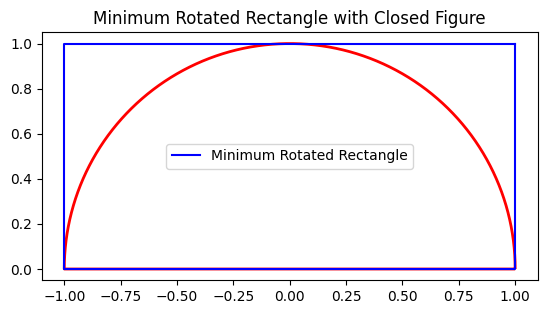

Width: 2, Height: 1


In [36]:
import math
from shapely.geometry import Polygon, MultiPoint

def get_minimum_rectangle_dimensions(polygon: Polygon):
    """
    Toma un objeto Polygon que representa un rectángulo mínimo rotado y devuelve su ancho y alto redondeados hacia arriba.
    
    :param polygon: shapely.geometry.Polygon
    :return: (width, height)
    """
    # Obtener los límites del rectángulo mínimo rotado
    minx, miny, maxx, maxy = polygon.bounds
    
    # Calcular el ancho y alto y redondear hacia arriba
    width = math.ceil(maxx - minx)
    height = math.ceil(maxy - miny)
    
    return width, height

# Ejemplo de uso con el rectángulo mínimo rotado obtenido anteriormente
polygon = visualize_minimum_rotated_rectangle_with_closed_figure("example_closed_figure.shp")
width, height = get_minimum_rectangle_dimensions(polygon)
print(f"Width: {width}, Height: {height}")


In [ ]:
def calculate_initial_count(container_width, container_length, rect_width, rect_height):
    """
    Calcula el mejor valor inicial para el número de rectángulos que caben en el contenedor.
    
    :param container_width: Ancho del contenedor
    :param container_length: Largo del contenedor
    :param rect_width: Ancho del rectángulo
    :param rect_height: Alto del rectángulo
    :return: Valor inicial
    """
    container_area = container_width * container_length
    rect_area = rect_width * rect_height
    max_figures = container_area // rect_area
    initial_count = max_figures - 1  # Comenzamos con una figura menos del máximo teórico
    return initial_count

# Calcular el valor inicial
container_width = 120
container_length = 60
initial_count = calculate_initial_count(container_width, container_length, width, height)
print(f"Initial Count: {initial_count}")


Initial Count: 35


In [ ]:
import geopandas as gpd
from shapely.geometry import box
from hyperpack import HyperPack
import re

# Función para generar ítems adicionales
def generate_items(count, width, height):
    items = {}
    for i in range(count):
        items[f"item-{i}"] = {"w": width, "l": height}
    return items

# Función para verificar y agregar ítems hasta que se llene el contenedor
def pack_items_until_full(container, width, height, initial_count, settings):
    count = initial_count  # Comenzamos con el valor inicial calculado
    
    max_count = 0
    while True:
        items = generate_items(count, width, height)
        problem_data = {
            "containers": container,
            "items": items,
            "settings": settings
        }
        
        # Crear la instancia del problema
        problem = HyperPack(**problem_data)
        
        # Realizar la búsqueda
        problem.hypersearch()
        
        # Obtener la solución
        solution_log = problem.log_solution()
        print(solution_log)

        # Extraer ítems restantes del log
        remaining_items_match = re.search(r"Remaining items : \[(.*)\]", solution_log)
        remaining_items = remaining_items_match.group(1).split(", ") if remaining_items_match else []

        # Si hay ítems restantes, hemos terminado
        if remaining_items and remaining_items[0] != '':
            break
        
        # Si no hay ítems restantes, almacenar el máximo alcanzado
        max_count = count
        
        # Aumentar el contador de figuras
        count += 1
    
    # Retroceder un paso para la solución final sin residuos
    items = generate_items(max_count, width, height)
    problem_data = {
        "containers": container,
        "items": items,
        "settings": settings
    }
    
    # Crear la instancia final del problema
    problem = HyperPack(**problem_data)
    problem.hypersearch()
    
    # Mostrar la figura final de la solución
    problem.create_figure(show=True)
    return problem.solution

# Función para guardar la solución en un archivo shapefile
def save_solution_as_shapefile(solution, filename="solution.shp"):
    geometries = []
    for container_id, items in solution.items():
        for item_id, coords in items.items():
            x, y, width, height = coords
            rectangle = box(x, y, x + width, y + height)
            geometries.append(rectangle)
    
    gdf = gpd.GeoDataFrame(geometry=geometries)
    gdf.to_file(filename, driver="ESRI Shapefile")
    print(f"Solution saved to {filename}")

# Definir la configuración (settings)
settings = {
    "algorithm": "hypersearch",
    "max_iterations": 1000
}

# Definir el contenedor de 120x60
container = {
    "container-0": {
        "W": container_width,
        "L": container_length
    }
}

# Ejecutar la función para empaquetar ítems hasta que se llene el contenedor
solution = pack_items_until_full(container, width, height, initial_count, settings)
print("Final Solution:")
print(solution)

# Guardar la solución en un archivo shapefile
save_solution_as_shapefile(solution)



Solution Log:
Percent total items stored : 100.0000%
Container: container-0 12x6
	[util%] : 97.2222%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 12x6
	[util%] : 100.0000%

Remaining items : []

Solution Log:
Percent total items stored : 97.2973%
Container: container-0 12x6
	[util%] : 100.0000%

Remaining items : ['item-0']


Final Solution:
{'container-0': {'item-9': [0, 0, 2, 1], 'item-8': [0, 1, 2, 1], 'item-7': [0, 2, 2, 1], 'item-6': [0, 3, 2, 1], 'item-5': [0, 4, 2, 1], 'item-4': [0, 5, 2, 1], 'item-35': [2, 0, 2, 1], 'item-34': [2, 1, 2, 1], 'item-33': [2, 2, 2, 1], 'item-32': [2, 3, 2, 1], 'item-31': [2, 4, 2, 1], 'item-30': [2, 5, 2, 1], 'item-3': [4, 0, 2, 1], 'item-29': [4, 1, 2, 1], 'item-28': [4, 2, 2, 1], 'item-27': [4, 3, 2, 1], 'item-26': [4, 4, 2, 1], 'item-25': [4, 5, 2, 1], 'item-24': [6, 0, 2, 1], 'item-23': [6, 1, 2, 1], 'item-22': [6, 2, 2, 1], 'item-21': [6, 3, 2, 1], 'item-20': [6, 4, 2, 1], 'item-2': [6, 5, 2, 1], 'item-19': [8, 0, 2, 1], 'item-18': [8, 1, 2, 1], 'item-17': [8, 2, 2, 1], 'item-16': [8, 3, 2, 1], 'item-15': [8, 4, 2, 1], 'item-14': [8, 5, 2, 1], 'item-13': [10, 0, 2, 1], 'item-12': [10, 1, 2, 1], 'item-11': [10, 2, 2, 1], 'item-10': [10, 3, 2, 1], 'item-1': [10, 4, 2, 1], 'item-0': [10, 5, 2, 1]}}
Solution saved to solution.shp


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.



Example shapefile created at example_half_circle.shp


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.



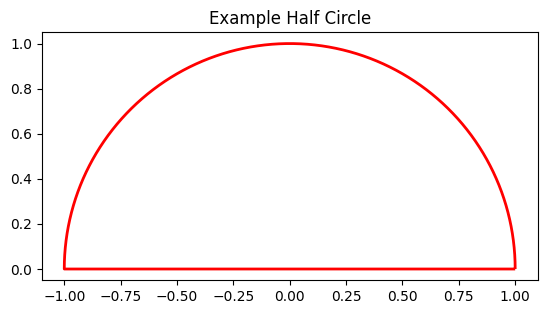

/var/folders/v7/7x179_695qqc_mlsjrp0m7gm0000gn/T/ipykernel_76190/3596479862.py:55: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



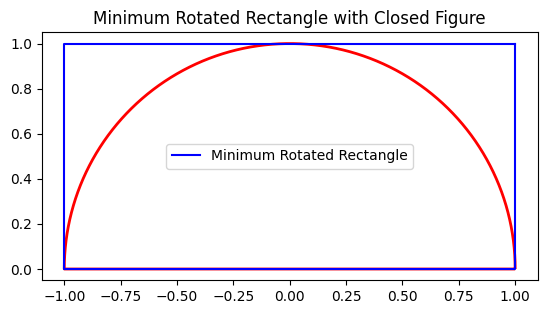

Minimum Rotated Rectangle: POLYGON ((1.0000000000000002 0.999874127673875, -0.9999999999999999 0.9998741276738752, -1 0.0000000000000001, 1 -0.0000000000000001, 1.0000000000000002 0.999874127673875))
Width: 2, Height: 1
Initial Count: 3599

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 99.9722%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 100.0000%

Remaining items : []

Solution Log:
Percent total items stored : 99.9722%
Container: container-0 120x60
	[util%] : 100.0000%

Remaining items : ['item-0']


If not showing or exporting the figure makes the operation obsolete.


Final Solution:
{'container-0': {'item-999': [0, 0, 2, 1], 'item-998': [0, 1, 2, 1], 'item-997': [0, 2, 2, 1], 'item-996': [0, 3, 2, 1], 'item-995': [0, 4, 2, 1], 'item-994': [0, 5, 2, 1], 'item-993': [0, 6, 2, 1], 'item-992': [0, 7, 2, 1], 'item-991': [0, 8, 2, 1], 'item-990': [0, 9, 2, 1], 'item-99': [0, 10, 2, 1], 'item-989': [0, 11, 2, 1], 'item-988': [0, 12, 2, 1], 'item-987': [0, 13, 2, 1], 'item-986': [0, 14, 2, 1], 'item-985': [0, 15, 2, 1], 'item-984': [0, 16, 2, 1], 'item-983': [0, 17, 2, 1], 'item-982': [0, 18, 2, 1], 'item-981': [0, 19, 2, 1], 'item-980': [0, 20, 2, 1], 'item-98': [0, 21, 2, 1], 'item-979': [0, 22, 2, 1], 'item-978': [0, 23, 2, 1], 'item-977': [0, 24, 2, 1], 'item-976': [0, 25, 2, 1], 'item-975': [0, 26, 2, 1], 'item-974': [0, 27, 2, 1], 'item-973': [0, 28, 2, 1], 'item-972': [0, 29, 2, 1], 'item-971': [0, 30, 2, 1], 'item-970': [0, 31, 2, 1], 'item-97': [0, 32, 2, 1], 'item-969': [0, 33, 2, 1], 'item-968': [0, 34, 2, 1], 'item-967': [0, 35, 2, 1], 'item-96

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.



In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPoint, box
from shapely.affinity import rotate
import numpy as np
import math
from hyperpack import HyperPack
import re

# Crear un GeoDataFrame con un medio círculo
def create_example_shapefile_with_half_circle(filename="example_half_circle.shp"):
    # Crear un medio círculo
    angle_range = np.linspace(0, np.pi, 100)  # Rango de ángulos para medio círculo
    circle_points = [(np.cos(angle), np.sin(angle)) for angle in angle_range]
    circle_points.append((0, 0))  # Cerrar la figura
    half_circle = Polygon(circle_points)
    
    # Crear un GeoDataFrame
    gdf = gpd.GeoDataFrame(geometry=[half_circle])
    
    # Guardar el GeoDataFrame como un archivo Shapefile
    gdf.to_file(filename, driver="ESRI Shapefile")
    print(f"Example shapefile created at {filename}")

# Crear el archivo Shapefile de ejemplo con un medio círculo
create_example_shapefile_with_half_circle()

# Leer el archivo Shapefile y visualizar el medio círculo
gdf = gpd.read_file("example_half_circle.shp")
gdf.plot(edgecolor='red', linewidth=2, facecolor='none')
plt.title("Example Half Circle")
plt.show()

# Función para calcular el rectángulo mínimo rotado y visualizarlo
def visualize_minimum_rotated_rectangle_with_closed_figure(shapefile_path):
    # Leer el shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Extraer los puntos del polígono cerrado
    points = []
    for geom in gdf.geometry:
        if geom.geom_type == 'Polygon':
            points.extend(geom.exterior.coords)
    
    # Convertir los puntos en un MultiPoint y calcular el rectángulo mínimo rotado
    multipoint = MultiPoint(points)
    polygon = multipoint.minimum_rotated_rectangle
    
    # Visualizar la figura cerrada original y el rectángulo mínimo rotado
    fig, ax = plt.subplots()
    gdf.plot(ax=ax, edgecolor='red', linewidth=2, facecolor='none', label='Closed Figure')
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue', label='Minimum Rotated Rectangle')
    plt.title("Minimum Rotated Rectangle with Closed Figure")
    plt.legend()
    plt.show()
    
    return polygon

# Visualizar el rectángulo mínimo rotado junto con la figura cerrada original
polygon = visualize_minimum_rotated_rectangle_with_closed_figure("example_half_circle.shp")
print(f"Minimum Rotated Rectangle: {polygon}")

# Obtener las dimensiones del rectángulo mínimo rotado
def get_minimum_rectangle_dimensions(polygon: Polygon):
    """
    Toma un objeto Polygon que representa un rectángulo mínimo rotado y devuelve su ancho y alto redondeados hacia arriba.
    
    :param polygon: shapely.geometry.Polygon
    :return: (width, height)
    """
    # Obtener los límites del rectángulo mínimo rotado
    minx, miny, maxx, maxy = polygon.bounds
    
    # Calcular el ancho y alto y redondear hacia arriba
    width = math.ceil(maxx - minx)
    height = math.ceil(maxy - miny)
    
    return width, height

# Ejemplo de uso con el rectángulo mínimo rotado obtenido anteriormente
width, height = get_minimum_rectangle_dimensions(polygon)
print(f"Width: {width}, Height: {height}")

def calculate_initial_count(container_width, container_length, rect_width, rect_height):
    """
    Calcula el mejor valor inicial para el número de rectángulos que caben en el contenedor.
    
    :param container_width: Ancho del contenedor
    :param container_length: Largo del contenedor
    :param rect_width: Ancho del rectángulo
    :param rect_height: Alto del rectángulo
    :return: Valor inicial
    """
    container_area = container_width * container_length
    rect_area = rect_width * rect_height
    max_figures = container_area // rect_area
    initial_count = max_figures - 1  # Comenzamos con una figura menos del máximo teórico
    return initial_count

# Calcular el valor inicial
container_width = 120
container_length = 60
initial_count = calculate_initial_count(container_width, container_length, width, height)
print(f"Initial Count: {initial_count}")

# Función para generar ítems adicionales
def generate_items(count, width, height):
    items = {}
    for i in range(count):
        items[f"item-{i}"] = {"w": width, "l": height}
    return items

# Función para verificar y agregar ítems hasta que se llene el contenedor
def pack_items_until_full(container, width, height, initial_count, settings):
    count = initial_count  # Comenzamos con el valor inicial calculado
    
    max_count = 0
    while True:
        items = generate_items(count, width, height)
        problem_data = {
            "containers": container,
            "items": items,
            "settings": settings
        }
        
        # Crear la instancia del problema
        problem = HyperPack(**problem_data)
        
        # Realizar la búsqueda
        problem.hypersearch()
        
        # Obtener la solución
        solution_log = problem.log_solution()
        print(solution_log)

        # Extraer ítems restantes del log
        remaining_items_match = re.search(r"Remaining items : \[(.*)\]", solution_log)
        remaining_items = remaining_items_match.group(1).split(", ") if remaining_items_match else []

        # Si hay ítems restantes, hemos terminado
        if remaining_items and remaining_items[0] != '':
            break
        
        # Si no hay ítems restantes, almacenar el máximo alcanzado
        max_count = count
        
        # Aumentar el contador de figuras
        count += 1
    
    # Retroceder un paso para la solución final sin residuos
    items = generate_items(max_count, width, height)
    problem_data = {
        "containers": container,
        "items": items,
        "settings": settings
    }
    
    # Crear la instancia final del problema
    problem = HyperPack(**problem_data)
    problem.hypersearch()
    
    # Mostrar la figura final de la solución
    problem.create_figure(show=False)  # Cambiado a False para evitar el error de visualización
    return problem.solution

# Función para guardar la solución en un archivo shapefile
def save_solution_as_shapefile(solution, original_geometry, filename="solution.shp"):
    geometries = []
    for container_id, items in solution.items():
        for item_id, coords in items.items():
            x, y, width, height = coords
            rectangle = box(x, y, x + width, y + height)
            geometries.append(rectangle)
    
    # Añadir la geometría original
    geometries.append(original_geometry)
    
    gdf = gpd.GeoDataFrame(geometry=geometries)
    gdf.to_file(filename, driver="ESRI Shapefile")
    print(f"Solution saved to {filename}")

# Definir la configuración (settings)
settings = {
    "algorithm": "hypersearch",
    "max_iterations": 1000
}

# Definir el contenedor de 120x60
container = {
    "container-0": {
        "W": container_width,
        "L": container_length
    }
}

# Ejecutar la función para empaquetar ítems hasta que se llene el contenedor
solution = pack_items_until_full(container, width, height, initial_count, settings)
print("Final Solution:")
print(solution)

# Guardar la solución en un archivo shapefile, incluyendo la figura original
original_geometry = gdf.geometry[0]
save_solution_as_shapefile(solution, original_geometry)


Example shapefile created at example_half_circle.shp


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.



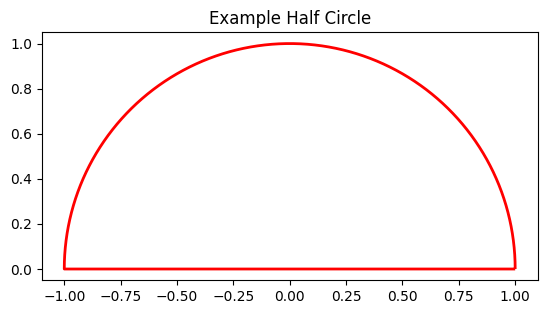

/var/folders/v7/7x179_695qqc_mlsjrp0m7gm0000gn/T/ipykernel_76190/233657397.py:47: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



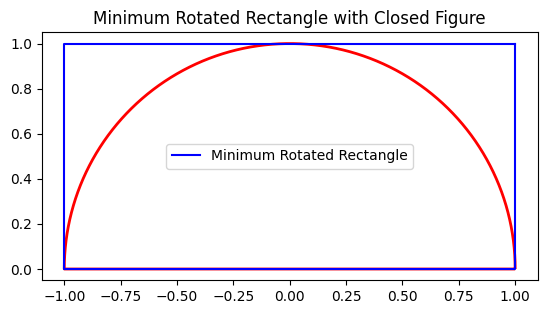

Minimum Rotated Rectangle: POLYGON ((1.0000000000000002 0.999874127673875, -0.9999999999999999 0.9998741276738752, -1 0.0000000000000001, 1 -0.0000000000000001, 1.0000000000000002 0.999874127673875))
Width: 2, Height: 1
Initial Count: 3599

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 99.9722%

Remaining items : []

Solution Log:
Percent total items stored : 100.0000%
Container: container-0 120x60
	[util%] : 100.0000%

Remaining items : []

Solution Log:
Percent total items stored : 99.9722%
Container: container-0 120x60
	[util%] : 100.0000%

Remaining items : ['item-0']


If not showing or exporting the figure makes the operation obsolete.


Final Solution:
{'container-0': {'item-999': [0, 0, 2, 1], 'item-998': [0, 1, 2, 1], 'item-997': [0, 2, 2, 1], 'item-996': [0, 3, 2, 1], 'item-995': [0, 4, 2, 1], 'item-994': [0, 5, 2, 1], 'item-993': [0, 6, 2, 1], 'item-992': [0, 7, 2, 1], 'item-991': [0, 8, 2, 1], 'item-990': [0, 9, 2, 1], 'item-99': [0, 10, 2, 1], 'item-989': [0, 11, 2, 1], 'item-988': [0, 12, 2, 1], 'item-987': [0, 13, 2, 1], 'item-986': [0, 14, 2, 1], 'item-985': [0, 15, 2, 1], 'item-984': [0, 16, 2, 1], 'item-983': [0, 17, 2, 1], 'item-982': [0, 18, 2, 1], 'item-981': [0, 19, 2, 1], 'item-980': [0, 20, 2, 1], 'item-98': [0, 21, 2, 1], 'item-979': [0, 22, 2, 1], 'item-978': [0, 23, 2, 1], 'item-977': [0, 24, 2, 1], 'item-976': [0, 25, 2, 1], 'item-975': [0, 26, 2, 1], 'item-974': [0, 27, 2, 1], 'item-973': [0, 28, 2, 1], 'item-972': [0, 29, 2, 1], 'item-971': [0, 30, 2, 1], 'item-970': [0, 31, 2, 1], 'item-97': [0, 32, 2, 1], 'item-969': [0, 33, 2, 1], 'item-968': [0, 34, 2, 1], 'item-967': [0, 35, 2, 1], 'item-96

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:698: UserWarning:

'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.



In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoint, box
from shapely.affinity import translate
import numpy as np
import math
from hyperpack import HyperPack
import re

# Crear un GeoDataFrame con un medio círculo
def create_example_shapefile_with_half_circle(filename="example_half_circle.shp"):
    angle_range = np.linspace(0, np.pi, 100)  # Rango de ángulos para medio círculo
    circle_points = [(np.cos(angle), np.sin(angle)) for angle in angle_range]
    circle_points.append((0, 0))  # Cerrar la figura
    half_circle = Polygon(circle_points)
    
    gdf = gpd.GeoDataFrame(geometry=[half_circle])
    gdf.to_file(filename, driver="ESRI Shapefile")
    print(f"Example shapefile created at {filename}")

# Crear el archivo Shapefile de ejemplo con un medio círculo
create_example_shapefile_with_half_circle()

# Leer el archivo Shapefile y visualizar el medio círculo
gdf = gpd.read_file("example_half_circle.shp")
gdf.plot(edgecolor='red', linewidth=2, facecolor='none')
plt.title("Example Half Circle")
plt.show()

# Función para calcular el rectángulo mínimo rotado y visualizarlo
def visualize_minimum_rotated_rectangle_with_closed_figure(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    
    points = []
    for geom in gdf.geometry:
        if geom.geom_type == 'Polygon':
            points.extend(geom.exterior.coords)
    
    multipoint = MultiPoint(points)
    polygon = multipoint.minimum_rotated_rectangle
    
    fig, ax = plt.subplots()
    gdf.plot(ax=ax, edgecolor='red', linewidth=2, facecolor='none', label='Closed Figure')
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue', label='Minimum Rotated Rectangle')
    plt.title("Minimum Rotated Rectangle with Closed Figure")
    plt.legend()
    plt.show()
    
    return polygon

polygon = visualize_minimum_rotated_rectangle_with_closed_figure("example_half_circle.shp")
print(f"Minimum Rotated Rectangle: {polygon}")

def get_minimum_rectangle_dimensions(polygon: Polygon):
    minx, miny, maxx, maxy = polygon.bounds
    width = math.ceil(maxx - minx)
    height = math.ceil(maxy - miny)
    return width, height

width, height = get_minimum_rectangle_dimensions(polygon)
print(f"Width: {width}, Height: {height}")

def calculate_initial_count(container_width, container_length, rect_width, rect_height):
    container_area = container_width * container_length
    rect_area = rect_width * rect_height
    max_figures = container_area // rect_area
    initial_count = max_figures - 1
    return initial_count

container_width = 120
container_length = 60
initial_count = calculate_initial_count(container_width, container_length, width, height)
print(f"Initial Count: {initial_count}")

def generate_items(count, width, height):
    items = {}
    for i in range(count):
        items[f"item-{i}"] = {"w": width, "l": height}
    return items

def pack_items_until_full(container, width, height, initial_count, settings):
    count = initial_count
    max_count = 0
    while True:
        items = generate_items(count, width, height)
        problem_data = {
            "containers": container,
            "items": items,
            "settings": settings
        }
        
        problem = HyperPack(**problem_data)
        problem.hypersearch()
        solution_log = problem.log_solution()
        print(solution_log)

        remaining_items_match = re.search(r"Remaining items : \[(.*)\]", solution_log)
        remaining_items = remaining_items_match.group(1).split(", ") if remaining_items_match else []

        if remaining_items and remaining_items[0] != '':
            break
        
        max_count = count
        count += 1
    
    items = generate_items(max_count, width, height)
    problem_data = {
        "containers": container,
        "items": items,
        "settings": settings
    }
    
    problem = HyperPack(**problem_data)
    problem.hypersearch()
    problem.create_figure(show=False)
    return problem.solution

def save_solution_as_shapefile(solution, original_shape, filename="solution.shp"):
    geometries = []
    for container_id, items in solution.items():
        for item_id, coords in items.items():
            x, y, width, height = coords
            
            # Mover la figura original al rectángulo
            moved_shape = translate(original_shape, xoff=x, yoff=y)
            geometries.append(moved_shape)
    
    gdf = gpd.GeoDataFrame(geometry=geometries)
    gdf.to_file(filename, driver="ESRI Shapefile")
    print(f"Solution saved to {filename}")

settings = {
    "algorithm": "hypersearch",
    "max_iterations": 1000
}

container = {
    "container-0": {
        "W": container_width,
        "L": container_length
    }
}

solution = pack_items_until_full(container, width, height, initial_count, settings)
print("Final Solution:")
print(solution)

gdf_original = gpd.read_file("example_half_circle.shp")
original_shape = gdf_original.geometry[0]

save_solution_as_shapefile(solution, original_shape)


In [ ]:
agregar mapeo para recorrer un punto decimal y poder usar decimales

In [ ]:
guarda la anterior para que no tengas que calcular de nuevo 